### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import Normalize

### Test functions

In [3]:
def Rast(X,A):
    test = A*X.shape[0]+np.sum(np.square(X)-A*np.cos(2*np.pi*X),axis=0)
    #test = A+np.sum(np.square(X)-A*np.cos(2*np.pi*X),axis=0)/X.shape[0]
    return test    
    
def Sphere(X):
    return np.sum(np.square(X),axis=0)

def Rose2D(X):
    XX = X[0,:]
    YY = X[1,:]
    return (1-XX)**2 + 100*(YY-XX**2)**2
    
def Ackley(X):
    f = -20*np.exp(-0.2*np.sqrt(0.5*(X[0,:]**2+X[1,:]**2))) - np.exp(0.5*(np.cos(2*np.pi*X[0,:])+np.cos(2*np.pi*X[1,:]))) + np.e + 20 
    return f

def Himmel(Z):
    X = Z[0,:]
    Y = Z[1,:]
    f = (X**2+Y-11)**2+(X+Y**2-7)**2
    return f

### Attractive-repulsive dynamics based optimization Rastrigin

In [11]:
#Initiate parameters
T = 10
h = 0.01
ite = int(T/h)
A = 10
d = 2
N = 15
runs = 100

#Random bounded particles
X_4_arr = np.random.rand(d,N,runs)
lower_bound = -8
upper_bound = -2
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  

#X_contour = np.zeros((d,N*int(T/h)))

#Changing parameters

eta = 1
results = np.zeros((4,4))


lambdaa_array = np.array([0,0.001,0.01,0.1])
lambdaa_array = np.array([0,1,10,100]) # Attempt 2
sigma_array = np.array([0.05,0.1,0.5,5])
sigma_array = np.array([0.1,0.5,1,2]) # Attempt 2
sigma_array = np.array([0.5, 1. , 2. , 4. ]) # Attempt 3
sigma_array = np.array([ 1. , 2. , 4. ,6]) # Attempt 4
alpha_array = np.array([0.9,0.7,0.5,0.3])
eta_array = np.array([0.5,1,1.5,2])
eta_array = np.array([0.1,0.5,1,5]) # Attempt 2
eta_array = np.array([0.05, 0.1 , 0.5 , 1.  ])  # Attempt 3

for l in range(4):
    
    sigma_v = sigma_array[l]
    for m in range(4):
        eta = eta_array[m]
        for j in range(4):
            lambdaa_v = lambdaa_array[j]
            for k in range(4):
                alpha = alpha_array[k]
                count = 0
                for y in range(runs):

                    X = X_4_arr2[:,:,y]
                    X_t = X
                    for x in range(ite):
                        lambdaa = lambdaa_v
                        sigma = sigma_v
                        if (x > int(ite*alpha)):
                            lambdaa = 0
                        if (x > int(ite*0.9)):
                            sigma = 0



                        #First term
                        numer = np.sum(X*np.exp(-20*Rast(X,A)),axis=1)
                        denom = np.sum(np.exp(-20*Rast(X,A)))
                        X_mean =numer/denom

                        first = X - X_mean[:,np.newaxis]

                        #Second term

                        N_X = X[0,:] 
                        N_Y = X[1,:]

                        N_X_diff = N_X - N_X[:,np.newaxis]
                        N_Y_diff = N_Y - N_Y[:,np.newaxis]

                        exponent = np.exp(-1/2*(N_X_diff**2+N_Y_diff**2))
                        sums_X = np.sum(N_X_diff*exponent,axis=0)
                        sums_Y = np.sum(N_Y_diff*exponent,axis=0)
                        second = np.array([sums_X,sums_Y])

                        xi = np.random.normal(0,1,(d,N))
                        third = first*xi
                        X_contour[:,x*N:(x+1)*N] = X
                        X = X - eta*first*h  + lambdaa/N*second*h + sigma*third*h**(1/2)

                    a_4 = np.sum(np.exp(-20*Rast(X,A)))
                    b_4 = np.sum(X*np.exp(-20*Rast(X,A)),axis=1)
                    c_4=b_4/a_4

                    if np.all(abs(c_4-np.array([0,0]))<0.20):
                        count +=1


                results[k,j] = count
        np.save(f'4Res_Test_l{l}_m{m}.npy', results)

C:\Users\gveva\AppData\Local\Temp\ipykernel_12264\4008598275.py:62: RuntimeWarning: invalid value encountered in divide
  X_mean =numer/denom


In [77]:
sigma_array

array([0.5, 1. , 2. , 4. ])

#### Contour plot

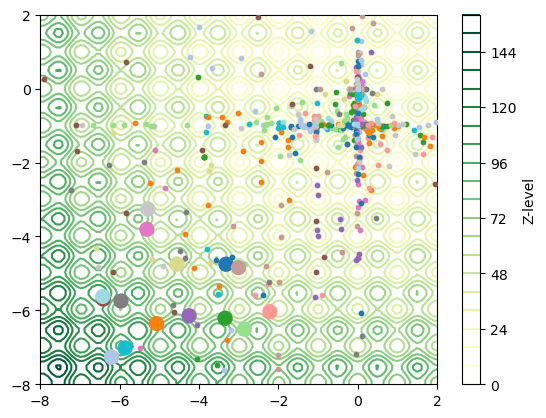

In [41]:
#Rastigin function and parameter space
XX = np.linspace(-8, 2, 100)     
YY = np.linspace(-8, 2, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence

for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-55:
    #if 70<x<80:
    #if x>ite-100:
        for j in range(N):
            if (-8 < X_contour[0, x*N+j] < 2) and (-8 < X_contour[1, x*N+j] < 2) :
                color = colors[j]
                plt.scatter(*X_contour[:, x*N+j], s=10, color=color, zorder=10)

plt.scatter(*X_t, s=100, color=colors, zorder=10)
#Download image as eps
plt.savefig('ContourRast82_high_noise.eps', format='eps')    
plt.show()

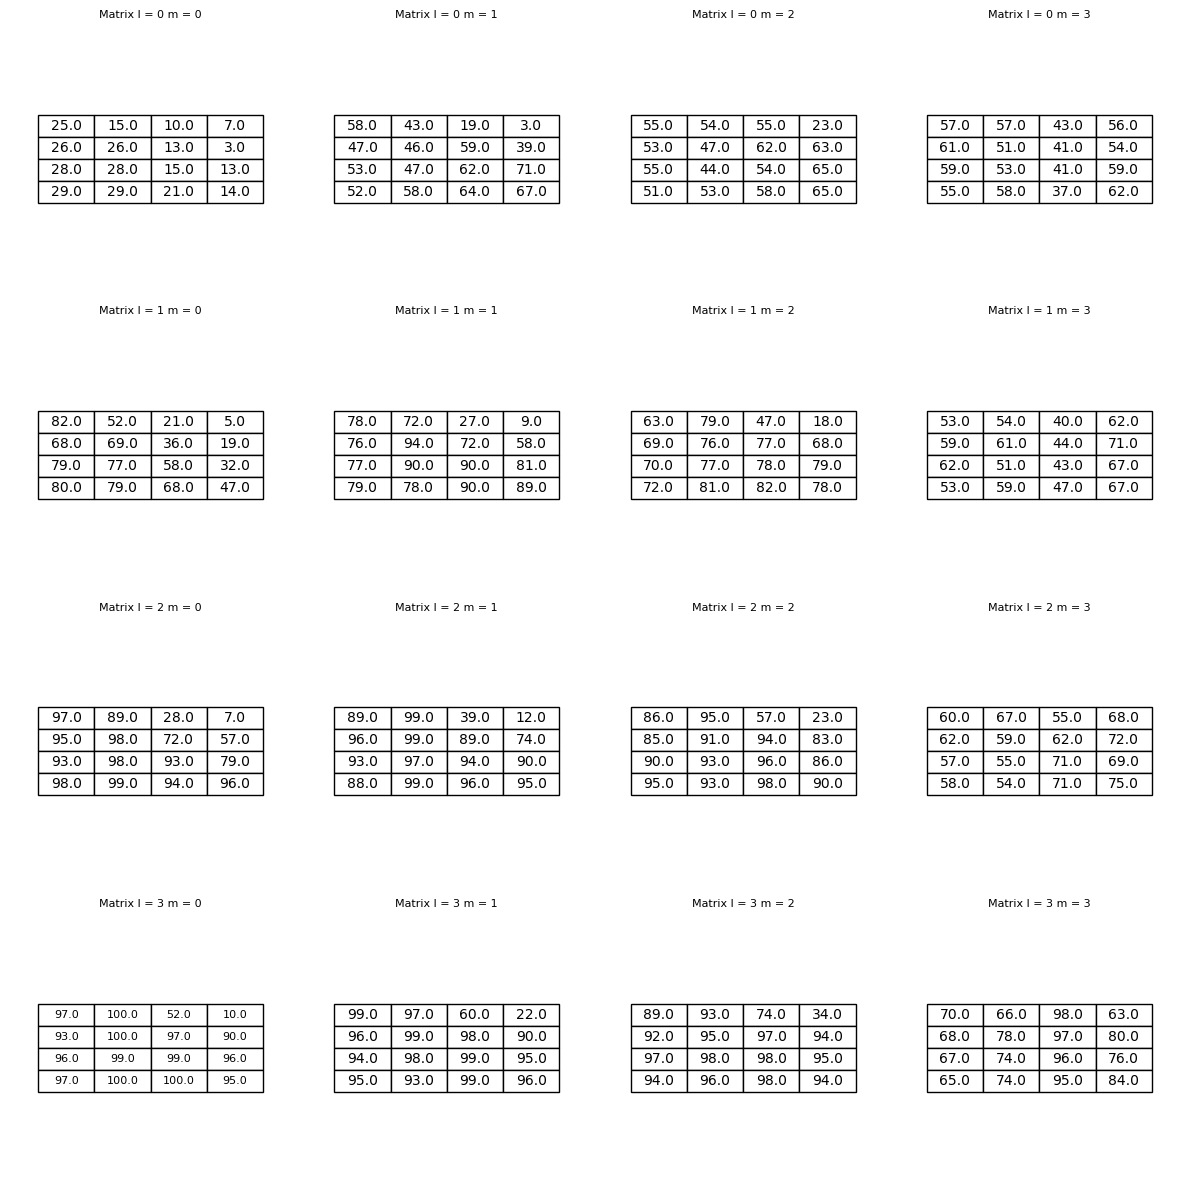

In [19]:
matrices = []
for h in range(4):
    for h2 in range(4):
        loaded_arr = np.load(f'2Res_Test_l{h}_m{h2}.npy')
        matrices.append(loaded_arr)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i * 4 + j
        axs[i, j].axis('off')  # Turn off the axes
        axs[i, j].table(cellText=np.round(matrices[index], 2), loc='center', colWidths=[0.2]*matrices[index].shape[1], cellLoc='center')  # Display the matrix as a table
        axs[i, j].set_title(f'Matrix l = {i} m = {j}', fontsize=8)  # Set subplot title

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

In [20]:
#Initiate parameters
T = 10
h = 0.01
ite = int(T/h)
A = 10
d = 2
N = 15
runs = 1

#Random bounded particles
X_4_arr = np.random.rand(d,N,runs)
lower_bound = -8 #-8
upper_bound = -2 #-2
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  

X_contour = np.zeros((d,N*int(T/h)))

#Changing parameters

eta = 1
results = np.zeros((4,4))


lambdaa_array = np.array([0,1,10,100])
lambdaa_array = np.array([0,5,25,50])
lambdaa_array = np.array([0,25,50,100])
sigma_array = np.array([0.05,0.1,0.5,5])
alpha_array = np.array([0.9,0.7,0.5,0.3])
eta_array = np.array([0.5,1,1.5,2])

for l in range(1):
    
    sigma_v = 2
    sigma_v = 10
    #sigma_v = 2
    #sigma_v = 0
    for m in range(1):
        #eta = 0.1
        eta = 1
        #eta = 0.05
        #eta = 0.1
        #eta = 10
        for j in range(1):
            lambdaa_v = lambdaa_array[j]
            #lambdaa_v = 25
            lambdaa_v = 0
            #lambdaa_v = 100
            for k in range(1):
                alpha = alpha_array[k]
                alpha = 0.5
                count = 0
                for y in range(runs):

                    X = X_4_arr2[:,:,y]
                    X_t = X
                    for x in range(ite):
                        lambdaa = lambdaa_v
                        sigma = sigma_v
                        if (x > int(ite*alpha)):
                            lambdaa = 0
                        if (x > int(ite*0.9)):
                            sigma = 0



                        #First term
                        numer = np.sum(X*np.exp(-20*Rast(X,A)),axis=1)
                        denom = np.sum(np.exp(-20*Rast(X,A)))
                        X_mean =numer/denom

                        first = X - X_mean[:,np.newaxis]

                        #Second term

                        N_X = X[0,:] 
                        N_Y = X[1,:]

                        N_X_diff = N_X - N_X[:,np.newaxis]
                        N_Y_diff = N_Y - N_Y[:,np.newaxis]

                        exponent = np.exp(-1/2*(N_X_diff**2+N_Y_diff**2))
                        sums_X = np.sum(N_X_diff*exponent,axis=0)
                        sums_Y = np.sum(N_Y_diff*exponent,axis=0)
                        second = np.array([sums_X,sums_Y])
                        
                        #Third term
                        xi = np.random.normal(0,1,(d,N))
                        third = first*xi
                        
                        
                        
                        X_contour[:,x*N:(x+1)*N] = X
                        X = X - eta*first*h  + lambdaa/N*second*h + sigma*third*h**(1/2)

                    a_4 = np.sum(np.exp(-20*Rast(X,A)))
                    b_4 = np.sum(X*np.exp(-20*Rast(X,A)),axis=1)
                    c_4=b_4/a_4

                    if np.all(abs(c_4-np.array([0,0]))<0.20):
                        count +=1


                results[k,j] = count
        #np.save(f'Res_Test_l{l}_m{m}.npy', results)
results

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
arr = results
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(arr)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "\\backslashbox{$\lambda$}{$h$} & "
for i in range(len(arr)):
    latex_code += f"${lambdaa_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(arr):
    latex_code += f"${alpha_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"

latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"
print(latex_code)

\begin{table}[htbp]
\caption{Your table caption here.}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\backslashbox{$\lambda$}{$h$} & $0$ & $25$ & $50$ & $100$ \\
\hline
$0.9$ & 1.0 \%& 18.6 \%& 9.4 \%& 6.1 \%\\
\hline
$0.7$ & 0.5 \%& 57.4 \%& 52.3 \%& 48.8 \%\\
\hline
$0.5$ & 0.9 \%& 60.9 \%& 55.6 \%& 51.3 \%\\
\hline
$0.3$ & 0.6 \%& 59.0 \%& 56.5 \%& 51.9 \%\\
\hline
\end{tabular}
\label{tab:my_table}
\end{table}



### Attractive-repulsive dynamics based optimization Rosenbrock

In [64]:
#Initiate parameters
T = 10
h = 0.01
ite = int(T/h)
A = 10
d = 2
N = 15
runs = 1

#Random bounded particles
X_4_arr = np.random.rand(d,N,runs)
lower_bound = -3
upper_bound = 3
X_4_arr2 = lower_bound + (upper_bound - lower_bound) * X_4_arr  

#X_contour = np.zeros((d,N*int(T/h)))

#Changing parameters

eta = 1
results = np.zeros((4,4))


lambdaa_array = np.array([0,0.001,0.01,0.1])
lambdaa_array = np.array([0,1,10,100]) # Attempt 2
sigma_array = np.array([0.05,0.1,0.5,5])
sigma_array = np.array([0.1,0.5,1,2]) # Attempt 2
sigma_array = np.array([0.5, 1. , 2. , 4. ]) # Attempt 3
alpha_array = np.array([0.9,0.7,0.5,0.3])
eta_array = np.array([0.5,1,1.5,2])
eta_array = np.array([0.1,0.5,1,5]) # Attempt 2
eta_array = np.array([0.05, 0.1 , 0.5 , 1.  ])  # Attempt 3

for l in range(1):
    
    sigma_v = sigma_array[l]
    sigma_v = 1
    for m in range(1):
        eta = eta_array[m]
        eta = 0.5
        for j in range(1):
            lambdaa_v = lambdaa_array[j]
            lambdaa_v = 1
            for k in range(1):
                alpha = alpha_array[k]
                alpha = 0.5
                count = 0
                for y in range(runs):

                    X = X_4_arr2[:,:,y]
                    X_t = X
                    for x in range(ite):
                        lambdaa = lambdaa_v
                        sigma = sigma_v
                        if (x > int(ite*alpha)):
                            lambdaa = 0
                        if (x > int(ite*0.9)):
                            sigma = 0



                        #First term
                        numer = np.sum(X*np.exp(-20*Rose2D(X)),axis=1)
                        denom = np.sum(np.exp(-20*Rose2D(X)))
                        X_mean =numer/denom

                        first = X - X_mean[:,np.newaxis]

                        #Second term

                        N_X = X[0,:] 
                        N_Y = X[1,:]

                        N_X_diff = N_X - N_X[:,np.newaxis]
                        N_Y_diff = N_Y - N_Y[:,np.newaxis]

                        exponent = np.exp(-1/2*(N_X_diff**2+N_Y_diff**2))
                        sums_X = np.sum(N_X_diff*exponent,axis=0)
                        sums_Y = np.sum(N_Y_diff*exponent,axis=0)
                        second = np.array([sums_X,sums_Y])

                        xi = np.random.normal(0,1,(d,N))
                        third = first*xi
                        X_contour[:,x*N:(x+1)*N] = X
                        X = X - eta*first*h  + lambdaa/N*second*h + sigma*third*h**(1/2)

                    a_4 = np.sum(np.exp(-20*Rose2D(X)))
                    b_4 = np.sum(X*np.exp(-20*Rose2D(X)),axis=1)
                    c_4=b_4/a_4

                    if np.all(abs(c_4-np.array([1,1]))<0.20):
                        count +=1


                results[k,j] = count
        #np.save(f'1Ros_Test_l{l}_m{m}.npy', results)
results

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [56]:
results

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

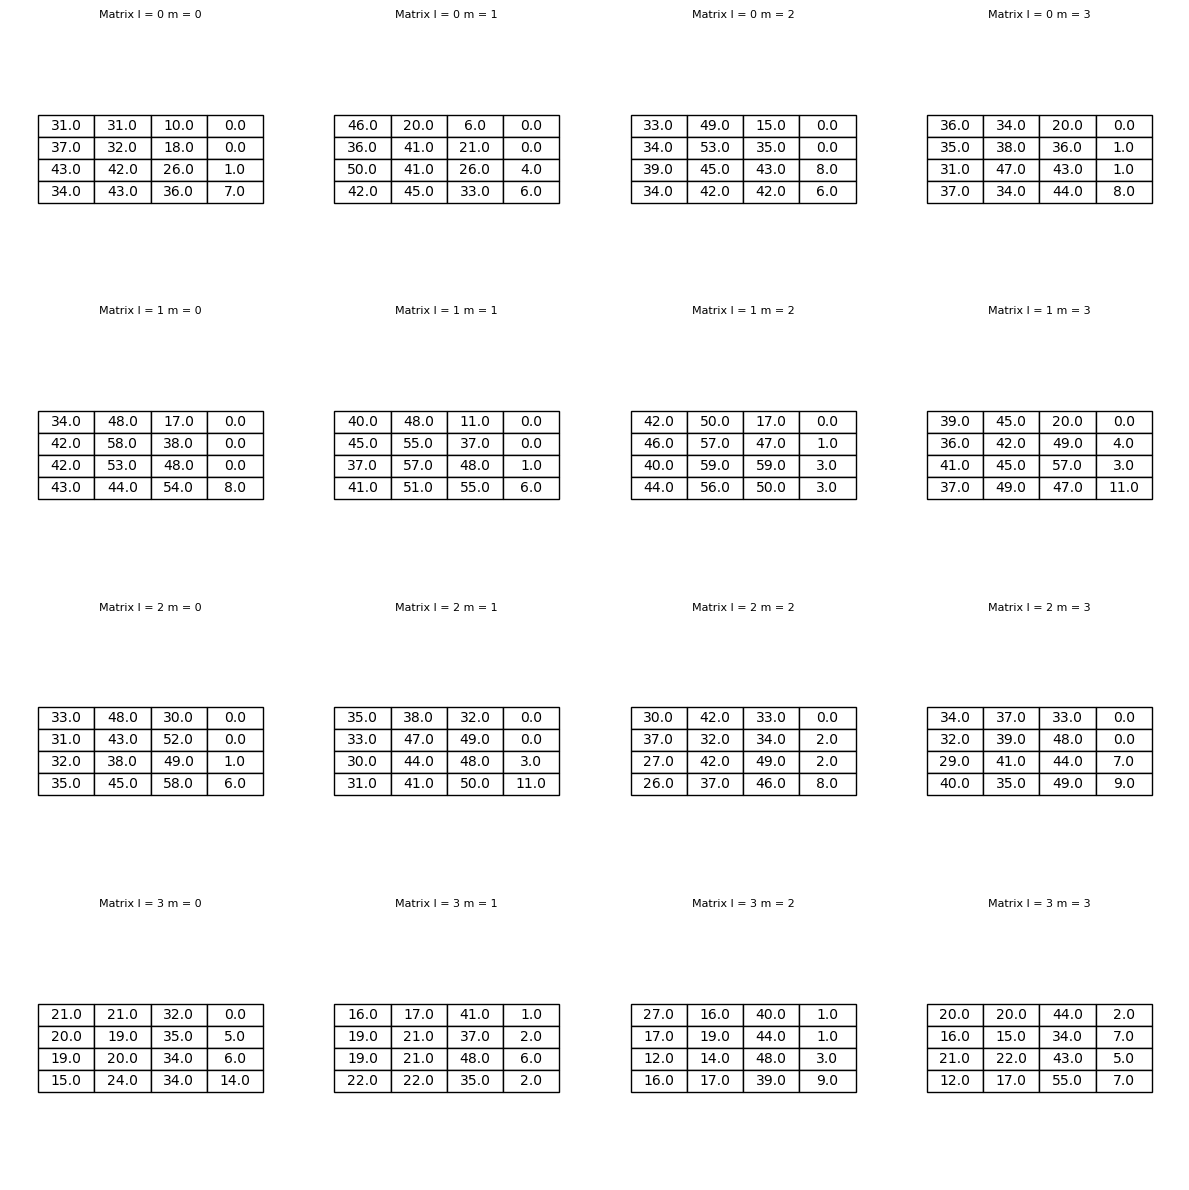

In [83]:
matrices = []
for h in range(4):
    for h2 in range(4):
        loaded_arr = np.load(f'1Ros_Test_l{h}_m{h2}.npy')
        matrices.append(loaded_arr)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i * 4 + j
        axs[i, j].axis('off')  # Turn off the axes
        axs[i, j].table(cellText=np.round(matrices[index], 2), loc='center', colWidths=[0.2]*matrices[index].shape[1], cellLoc='center')  # Display the matrix as a table
        axs[i, j].set_title(f'Matrix l = {i} m = {j}', fontsize=8)  # Set subplot title

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

In [48]:
arr = results
# Generate LaTeX code for the table
latex_code = "\\begin{table}[htbp]\n"
latex_code += "\\caption{Your table caption here.}\n"
latex_code += "\\centering\n"
latex_code += "\\begin{tabular}{|c|"
for i in range(len(arr)):
    latex_code += "c|"
latex_code += "}\n"
latex_code += "\\hline\n"

# Add alpha values as the first row
latex_code += "\\backslashbox{$\\alpha$}{$\lambda$} & "
for i in range(len(arr)):
    latex_code += f"${lambdaa_array[i]}$ & "
latex_code = latex_code[:-2] + "\\\\\n"
latex_code += "\\hline\n"

# Add beta values as the first column and the table values
for i, row in enumerate(arr):
    latex_code += f"${alpha_array[i]}$ & "
    for value in row:
        latex_code += f"{value/10:.1f} \%& "
    latex_code = latex_code[:-2] + "\\\\\n"
    latex_code += "\\hline\n"

latex_code += "\\end{tabular}\n"

latex_code += "\\label{tab:my_table}\n"
latex_code += "\\end{table}\n"
print(latex_code)

\begin{table}[htbp]
\caption{Your table caption here.}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\backslashbox{$\alpha$}{$\lambda$} & $0$ & $1$ & $10$ & $100$ \\
\hline
$0.9$ & 41.4 \%& 47.1 \%& 20.8 \%& 0.1 \%\\
\hline
$0.7$ & 37.9 \%& 53.0 \%& 49.0 \%& 0.5 \%\\
\hline
$0.5$ & 38.9 \%& 53.4 \%& 50.5 \%& 2.5 \%\\
\hline
$0.3$ & 40.0 \%& 46.8 \%& 50.1 \%& 7.7 \%\\
\hline
\end{tabular}
\label{tab:my_table}
\end{table}



In [ ]:
#Rastigin function and parameter space
XX = np.linspace(-3, 3, 100)     
YY = np.linspace(-3, 3, 100)     
XX, YY = np.meshgrid(XX, YY) 
Z = (XX**2 - 10 * np.cos(2 * np.pi * XX)) + \
    (YY**2 - 10 * np.cos(2 * np.pi * YY)) + 20

#Contour map 
fig, ax = plt.subplots()
#contour = ax.contour(XX, YY, Z, cmap=cm.nipy_spectral, levels=20)
contour = ax.contour(XX, YY, Z, cmap=cm.YlGn, levels=20)
contour_bar = plt.colorbar(contour, ax=ax, label='Z-level')

#Color map for particle iteration
norm = Normalize(vmin=0, vmax=ite - 1)
cmap = cm.cool 


colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence

for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-55:
    #if 70<x<80:
    #if x>ite-100:
        for j in range(N):
            if (-8 < X_contour[0, x*N+j] < 2) and (-8 < X_contour[1, x*N+j] < 2) :
                color = colors[j]
                plt.scatter(*X_contour[:, x*N+j], s=10, color=color, zorder=10)

plt.scatter(*X_t, s=100, color=colors, zorder=10)
#Download image as eps
plt.savefig('ContourRast82_high_noise.eps', format='eps')    
plt.show()

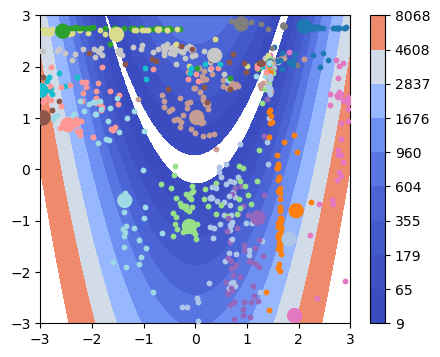

In [66]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import openturns as ot 

class Draw2DFunctions:
    def __init__(self, lowerbound, upperbound):
        self.grid_size = 100
        mesher = ot.IntervalMesher([self.grid_size-1] * 2)
        interval = ot.Interval(lowerbound, upperbound)
        mesh = mesher.build(interval)
        self.nodes = mesh.getVertices()
        self.X0, self.X1 = np.array(self.nodes).T.reshape(2, self.grid_size, self.grid_size)

    def draw_2D_contour(self, title, function=None, distribution=None, colorbar=cm.coolwarm, nb_isocurves=8, contour_values=True, opt_function_levels=True):
        fig = plt.figure(figsize=(5, 4))
        if distribution is not None:
            Zpdf = np.array(distribution.computePDF(self.nodes)).reshape(self.grid_size, self.grid_size)
            contours = plt.contour(self.X0, self.X1, Zpdf, nb_isocurves, colors='black', alpha=0.6)
            if contour_values:
                plt.clabel(contours, inline=True, fontsize=8)
        if function is not None:
            Z = np.array(function(self.nodes)).reshape(self.grid_size, self.grid_size)
            if opt_function_levels: 
                Z_sample = ot.Sample.BuildFromPoint(Z.flatten())
                # Compute levels
                nb_levels = 10
                epsilon_grid = 5e-2
                regular_grid = np.linspace(epsilon_grid, 1.0 - epsilon_grid, nb_levels)
                computed_levels = np.array(Z_sample.computeQuantile(regular_grid)).flatten()
            else: 
                computed_levels = 20
            plt.contourf(self.X0, self.X1, Z, levels=computed_levels, cmap=colorbar)
            plt.colorbar()
        #plt.title(title, fontsize=20)
        #plt.xlabel("$x_0$", fontsize=20)
        #plt.ylabel("$x_1$", fontsize=20)
        return fig
#
rosenbrock = ot.SymbolicFunction(["x1", "x2"], ["(1 - x1)^2 + 100 * (x2 - x1^2)^2"])
#funky_distribution = ot.ComposedDistribution([ot.Normal(0., 0.7)] * 2, ot.ClaytonCopula(2.))
d = Draw2DFunctions([-3.] * 2, [3.] * 2)
d.draw_2D_contour("Rosenbrock function", function=rosenbrock)#, distribution=funky_distribution, colorbar=cm.plasma)
colors = cm.tab20(np.linspace(0, 1, N))
#Plot particle in time sequence
for x in range(ite):
    if x%50 == 0 or x<50 or x>ite-50:
    #if x>ite-10:
        for j in range(N):
            if (-3 < X_contour[0, x*N+j] < 3) and (-3 < X_contour[1, x*N+j] < 3) :
                color = colors[j]
                plt.scatter(*X_contour[:, x*N+j], s=10, color=color, zorder=10)
        #plt.scatter(*X2_mean_contour[:, x], s=25, color="red", zorder=15)
plt.scatter(*X_t, s=100, color=colors, zorder=10)
#plt.scatter(1, 1, s=50, c='black', marker='o', label='Minimum at (1, 1)')
plt.savefig('CBORosenContourFAIL.eps', format='eps')    
plt.show()